In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import re
import statistics
import seaborn as sns

Overview

In [2]:
data=pd.read_csv("data/nba2k-full.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   full_name    464 non-null    object
 1   rating       464 non-null    int64 
 2   jersey       464 non-null    object
 3   team         441 non-null    object
 4   position     464 non-null    object
 5   b_day        464 non-null    object
 6   height       464 non-null    object
 7   weight       464 non-null    object
 8   salary       464 non-null    object
 9   country      464 non-null    object
 10  draft_year   464 non-null    int64 
 11  draft_round  464 non-null    object
 12  draft_peak   464 non-null    object
 13  college      388 non-null    object
 14  version      464 non-null    object
dtypes: int64(2), object(13)
memory usage: 54.5+ KB


In [4]:
# the names of the columns

print(f'There are {data.shape[0]} rows and {data.shape[1]} columns.\n')
print(f'Column names: {data.columns.values}')

There are 464 rows and 15 columns.

Column names: ['full_name' 'rating' 'jersey' 'team' 'position' 'b_day' 'height' 'weight'
 'salary' 'country' 'draft_year' 'draft_round' 'draft_peak' 'college'
 'version']


In [5]:
# type of data

data.dtypes

full_name      object
rating          int64
jersey         object
team           object
position       object
b_day          object
height         object
weight         object
salary         object
country        object
draft_year      int64
draft_round    object
draft_peak     object
college        object
version        object
dtype: object

In [6]:
# veri kümesindeki boş değerlere sahip ssütunlar

print(data.isna().sum())

full_name       0
rating          0
jersey          0
team           23
position        0
b_day           0
height          0
weight          0
salary          0
country         0
draft_year      0
draft_round     0
draft_peak      0
college        76
version         0
dtype: int64


In [7]:
# tüm oyuncuların average rating oranları

average_rating = data['rating'].mean()
print(f'Total average rating value: {round(average_rating, 1)}')

Total average rating value: 77.6


In [8]:
# Her bir oyuncunun adı ve ortalama değerlendirme oranını içeren DataFrame'i oluşturma

player_average_ratings = data.groupby('full_name')['rating'].mean().reset_index()
print(player_average_ratings)

             full_name  rating
0         Aaron Gordon    81.0
1        Aaron Holiday    73.0
2          Abdel Nader    70.0
3    Admiral Schofield    71.0
4           Al Horford    85.0
..                 ...     ...
424       Yogi Ferrell    74.0
425       Zach Collins    74.0
426        Zach LaVine    85.0
427       Zhaire Smith    72.0
428    Zion Williamson    81.0

[429 rows x 2 columns]


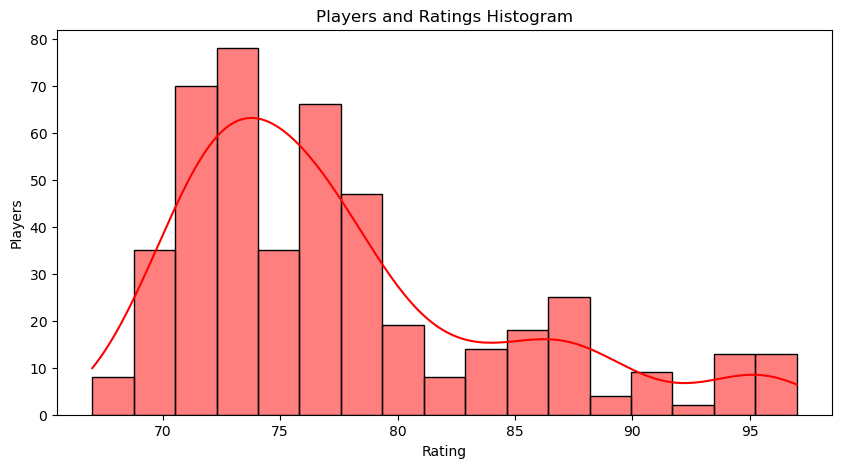

In [9]:
# Seaborn ile histogram oluşturma


plt.figure(figsize=(10, 5))
sns.histplot(data['rating'], bins='auto', kde=True, color='red')
plt.xlabel('Rating')
plt.ylabel('Players')
plt.title('Players and Ratings Histogram')
plt.show()

In [10]:
# ORTALAMA RATING İLE BÜTÜN OYUNCULARIN RATINGLERINI DEĞERLENDİRECEK YORUMLAYACAK BİR ŞEYLER EKLE

In [11]:
# yaşlarını 2020 yılına göre hesaplıyorum

from datetime import date

def age(born):
    if isinstance(born, date):
        return 2020 - born.year - ((2020, date.today().month, date.today().day) < (born.year, born.month, born.day))
    else:
        return None  # Eğer doğru tarih formatında değilse, None dönebilirsiniz.

data['b_day'] = pd.to_datetime(data['b_day'])
data['age'] = data['b_day'].apply(lambda row: age(row))

C:\Users\DeLL\AppData\Local\Temp\ipykernel_7584\960173057.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['b_day'] = pd.to_datetime(data['b_day'])


In [12]:
data.sort_values(by = 'age', ascending = False)[['full_name', 'rating', 'team', 'age']].head(25)


,full_name,rating,team,age
203,Pau Gasol,75,NaN,40
222,Kyle Korver,75,Milwaukee Bucks,39
282,Tyson Chandler,73,Houston Rockets,38
0,LeBron James,97,Los Angeles Lakers,36
167,Jose Juan Barea,76,Dallas Mavericks,36
429,LeBron James,97,Los Angeles Lakers,36
87,JJ Redick,80,New Orleans Pelicans,36
123,Andre Iguodala,78,Miami Heat,36
441,LeBron James,96,Los Angeles Lakers,36
108,PJ Tucker,79,Houston Rockets,35


In [13]:
# 25 oldest players.

data.sort_values(by = 'age', ascending = False)[['full_name', 'rating', 'team', 'age']].head(25)

,full_name,rating,team,age
203,Pau Gasol,75,NaN,40
222,Kyle Korver,75,Milwaukee Bucks,39
282,Tyson Chandler,73,Houston Rockets,38
0,LeBron James,97,Los Angeles Lakers,36
167,Jose Juan Barea,76,Dallas Mavericks,36
429,LeBron James,97,Los Angeles Lakers,36
87,JJ Redick,80,New Orleans Pelicans,36
123,Andre Iguodala,78,Miami Heat,36
441,LeBron James,96,Los Angeles Lakers,36
108,PJ Tucker,79,Houston Rockets,35


In [14]:
# 25 youngest players

data.sort_values(by = 'age', ascending = True)[['full_name', 'rating', 'team', 'age']].head(25)

,full_name,rating,team,age
310,Tyler Herro,73,Miami Heat,20
347,Kevin Porter,72,Cleveland Cavaliers,20
315,Nassir Little,73,Portland Trail Blazers,20
312,Sekou Doumbouya,73,Detroit Pistons,20
403,Talen Horton-Tucker,70,Los Angeles Lakers,20
387,Darius Bazley,70,Oklahoma City Thunder,20
380,Alen Smailagic,71,Golden State Warriors,20
357,Luka Samanic,72,San Antonio Spurs,20
72,Zion Williamson,81,New Orleans Pelicans,20
202,Coby White,76,Chicago Bulls,20


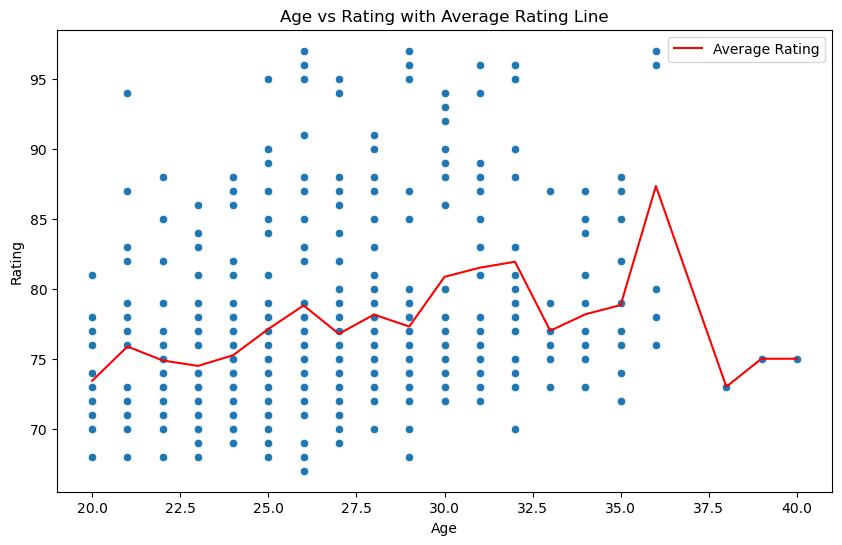

In [15]:
# Veri çerçevesini oluşturma

age_rating_data = data[['age', 'rating']]
age_rating_avg = age_rating_data.groupby('age')['rating'].mean().reset_index()

# Scatter plot oluşturma

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='rating', data=age_rating_data)

# Ortalama rating çizgisini ekleme

sns.lineplot(x='age', y='rating', data=age_rating_avg, color='red', label='Average Rating')

# Eksen etiketleri ve başlık ekleme

plt.xlabel('Age')
plt.ylabel('Rating')
plt.title('Age vs Rating with Average Rating Line')

# Legent'ı gösterme

plt.legend()

plt.show()

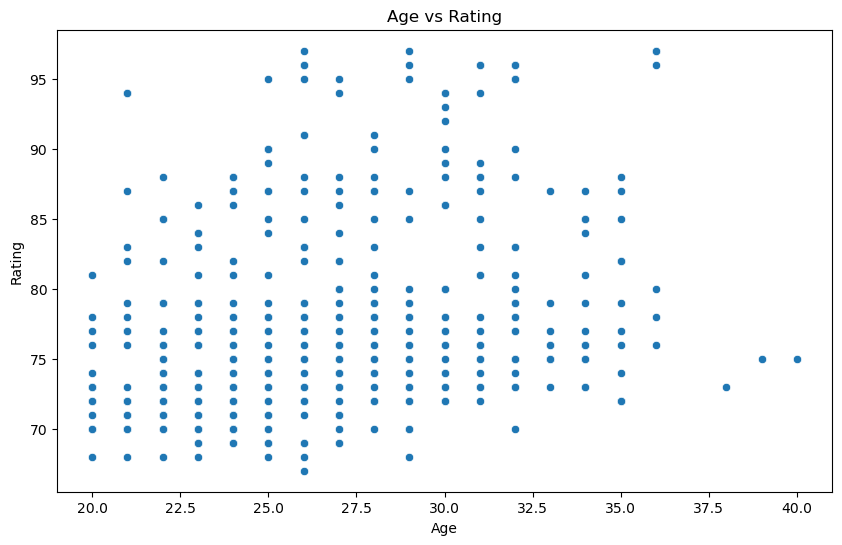

In [16]:
age_rating_data = data[['age', 'rating']]
age_rating_avg = age_rating_data.groupby('age')['rating'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='rating', data=age_rating_data)
plt.xlabel('Age')
plt.ylabel('Rating')
plt.title('Age vs Rating')
plt.show()

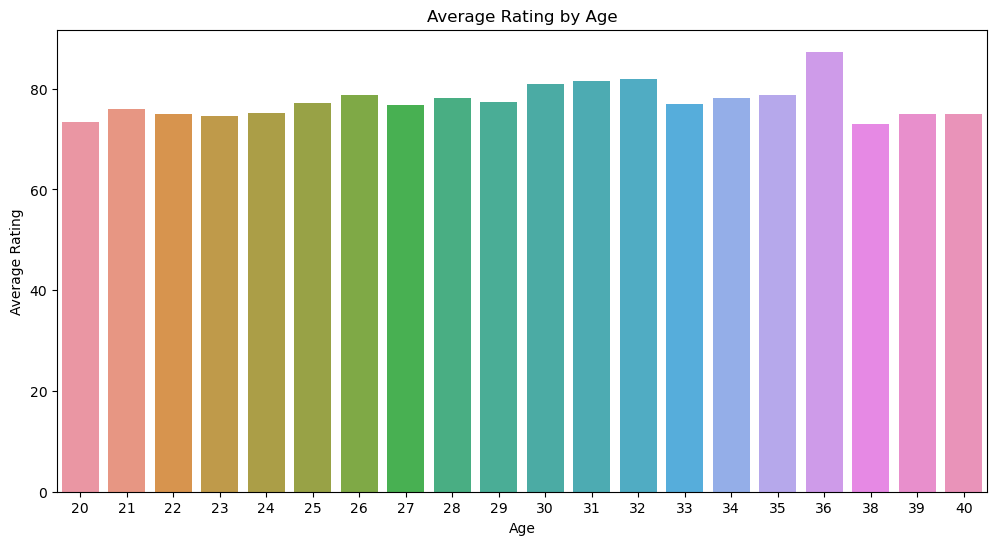

In [17]:
# Yaşa göre gruplanmış ortalama dereceyi gösteren bir çubuk grafiği de oluşturma.

plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='rating', data=age_rating_avg)
plt.xlabel('Age')
plt.ylabel('Average Rating')
plt.title('Average Rating by Age')
plt.show()

In [18]:
data.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version,age
0,LeBron James,97,#23,Los Angeles Lakers,F,1984-12-30,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN,NBA2k20,36
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,1991-06-29,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State,NBA2k20,29
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,1994-12-06,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN,NBA2k20,26
3,Kevin Durant,96,#7,Brooklyn Nets,F,1988-09-29,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas,NBA2k20,32
4,James Harden,96,#13,Houston Rockets,G,1989-08-26,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State,NBA2k20,31


In [19]:
data['country'].value_counts()

country
USA                                 346
Canada                               15
Australia                            10
France                                9
Serbia                                7
Germany                               6
Croatia                               6
Spain                                 6
Greece                                5
Cameroon                              5
Latvia                                4
Slovenia                              4
Italy                                 4
Turkey                                4
Nigeria                               3
Brazil                                2
Ukraine                               2
Democratic Republic of the Congo      2
Lithuania                             2
The Bahamas                           2
Bosnia and Herzegovina                2
New Zealand                           1
Mali                                  1
Haiti                                 1
Angola                          

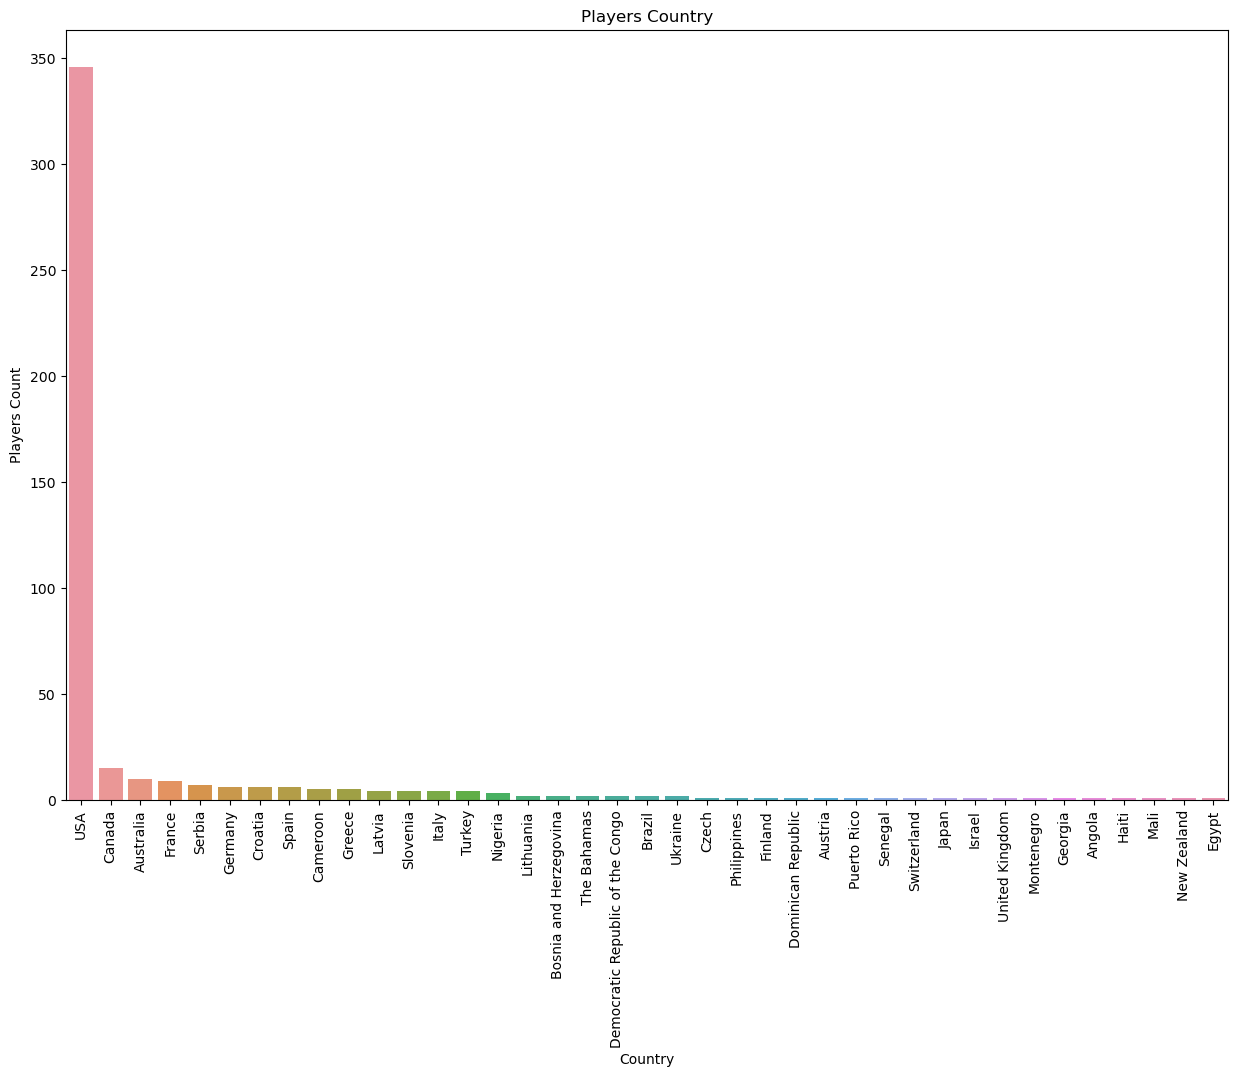

In [20]:
country_counts = data['country'].value_counts().sort_values(ascending=False)

# Çubuk grafik oluşturma

fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x=country_counts.index, y=country_counts.values, ax=ax)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Players Count')
plt.title("Players Country")

plt.show()

In [21]:
data['college'].value_counts()

college
Kentucky            28
Duke                25
North Carolina      13
Kansas              13
UCLA                13
                    ..
Tennessee State      1
Norfolk State        1
Marshall             1
Long Beach State     1
Dayton               1
Name: count, Length: 109, dtype: int64

In [22]:
# En çok temsil edilen üniversiteler

top_colleges = data['college'].value_counts().nlargest(25)

# Liste olarak yazdırma

print("Top 25 Colleges:")
print(top_colleges)

Top 25 Colleges:
college
Kentucky          28
Duke              25
North Carolina    13
Kansas            13
UCLA              13
Texas             13
Villanova          9
Arizona            9
Michigan           8
Indiana            8
Florida            7
Michigan State     7
USC                7
Wake Forest        7
Washington         6
Iowa State         6
UConn              5
Virginia           5
Marquette          5
Gonzaga            5
Tennessee          5
Texas A&M          5
Louisville         5
Creighton          4
Colorado           4
Name: count, dtype: int64


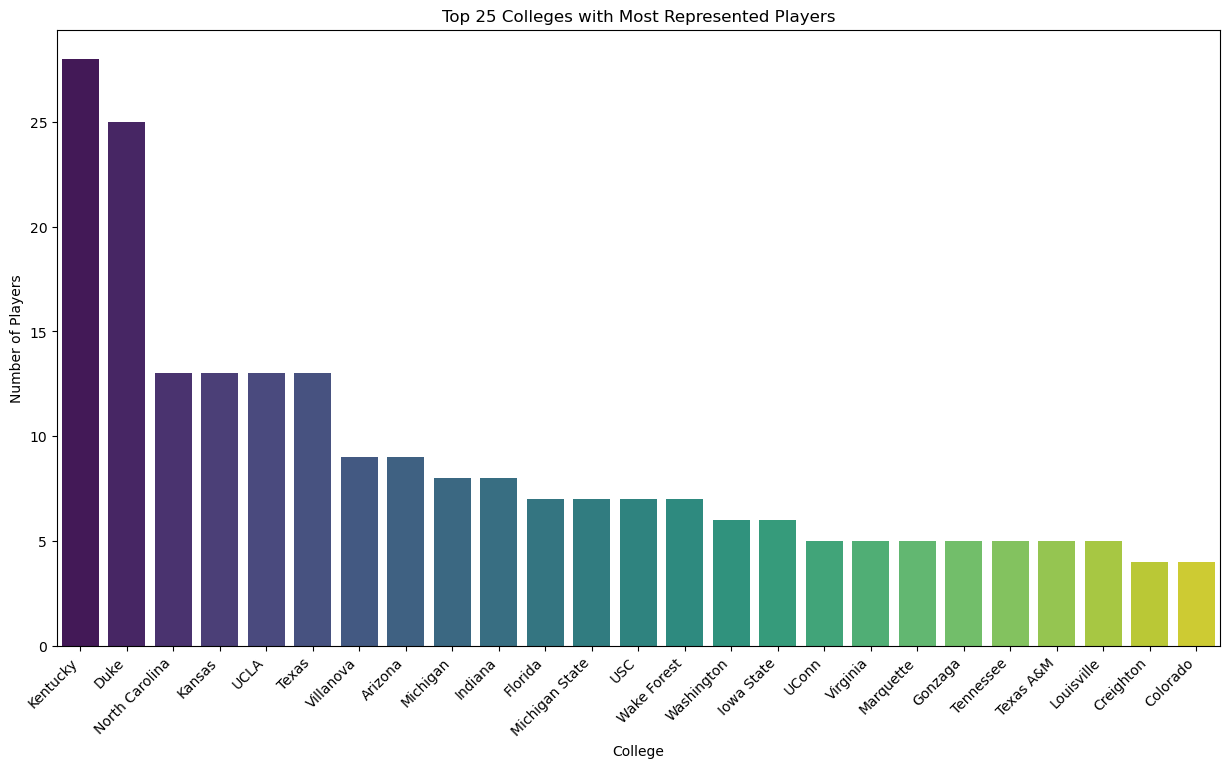

In [23]:
plt.figure(figsize=(15, 8))
sns.barplot(x=top_colleges.index, y=top_colleges.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel('College')
plt.ylabel('Number of Players')
plt.title('Top 25 Colleges with Most Represented Players')
plt.show()

In [24]:
# all most of the nba players come from USA and the Canada.

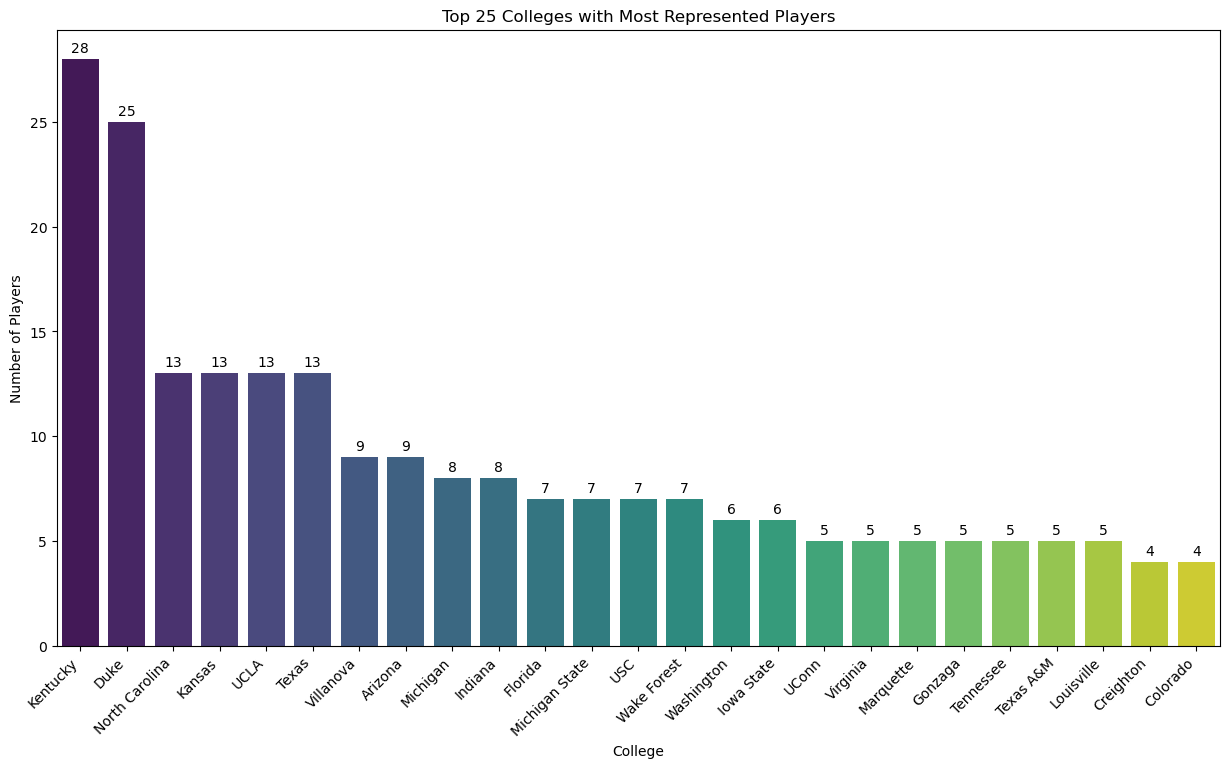

In [35]:
# Çubuk grafik oluşturma
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=top_colleges.index, y=top_colleges.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel('College')
plt.ylabel('Number of Players')
plt.title('Top 25 Colleges with Most Represented Players')

# Her bir çubuğun üzerine sayıları ekleme
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

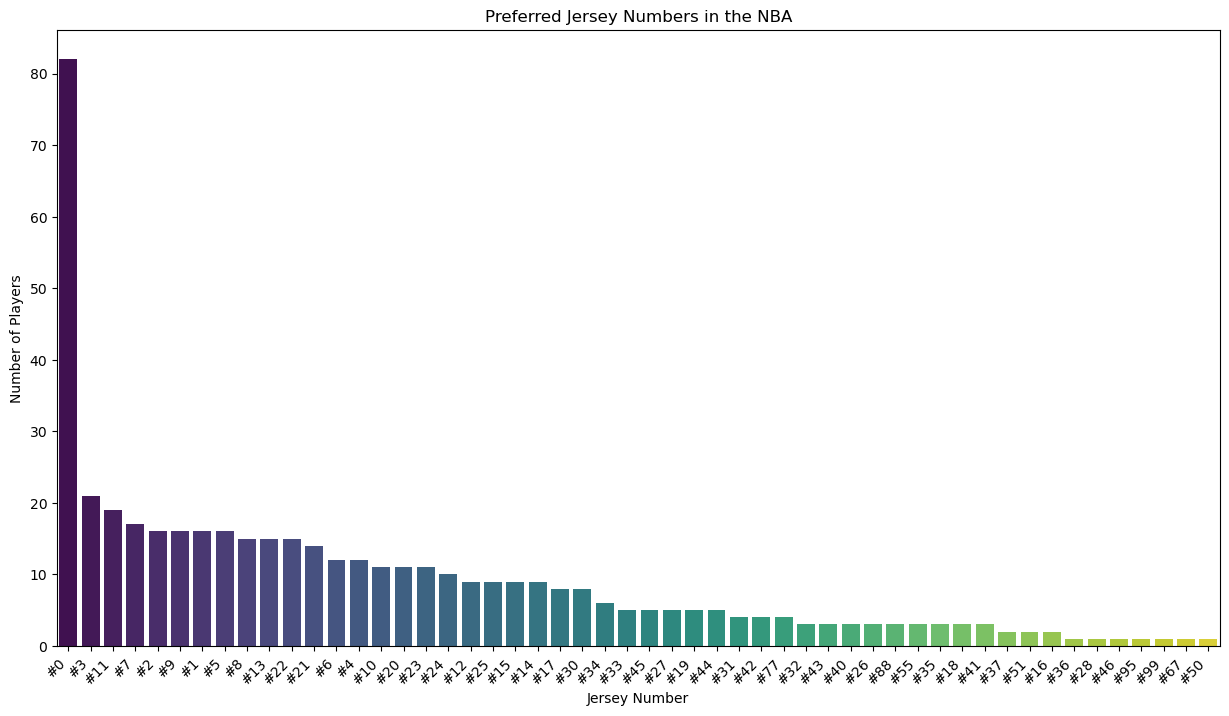

In [26]:
# Veri çerçevesini oluşturma (örnek olarak "jersey" sütunu kullanılıyor)
jersey_data = data['jersey']

# Forma numaralarının frekanslarını sayma
jersey_counts = jersey_data.value_counts()

# Seaborn ile çubuk grafiği oluşturma
plt.figure(figsize=(15, 8))
sns.barplot(x=jersey_counts.index, y=jersey_counts.values, palette="viridis")
plt.xlabel('Jersey Number')
plt.ylabel('Number of Players')
plt.title('Preferred Jersey Numbers in the NBA')
plt.xticks(rotation=45, ha='right')  # Eksen etiketlerini döndürmek
plt.show()

In [27]:
# "jersey" sütunundaki "#" işaretini kaldırma

data['jersey'] = data['jersey'].str.replace('#', '')

# Değişikliği kontrol etmek için ilk birkaç satırı gösterme

print(data['jersey'].head(30))

0     23
1      2
2     34
3      7
4     13
5     30
6      3
7     13
8      0
9     21
10    11
11    15
12     0
13    11
14    32
15    22
16    27
17    23
18    45
19     8
20    77
21    12
22     3
23    10
24    10
25     3
26     4
27     6
28     0
29    43
Name: jersey, dtype: object


In [28]:
# "full_name" sütununun adını "player_name" olarak değiştirme

data.rename(columns={'full_name': 'player_name'}, inplace=True)

# Değişikliği kontrol etmek için ilk birkaç satırı gösterme

print(data.head())

             player_name  rating jersey                  team position  \
0           LeBron James      97     23    Los Angeles Lakers        F   
1          Kawhi Leonard      97      2  Los Angeles Clippers        F   
2  Giannis Antetokounmpo      96     34       Milwaukee Bucks      F-G   
3           Kevin Durant      96      7         Brooklyn Nets        F   
4           James Harden      96     13       Houston Rockets        G   

       b_day       height                weight     salary country  \
0 1984-12-30   6-9 / 2.06  250 lbs. / 113.4 kg.  $37436858     USA   
1 1991-06-29   6-7 / 2.01  225 lbs. / 102.1 kg.  $32742000     USA   
2 1994-12-06  6-11 / 2.11  242 lbs. / 109.8 kg.  $25842697  Greece   
3 1988-09-29  6-10 / 2.08  230 lbs. / 104.3 kg.  $37199000     USA   
4 1989-08-26   6-5 / 1.96   220 lbs. / 99.8 kg.  $38199000     USA   

   draft_year draft_round draft_peak          college  version  age  
0        2003           1          1              NaN  NBA2k20  

In [29]:
# Total free agents: 23

free_agents = data[data['team'].isna()]
print(f'Total free agents: {free_agents.shape[0]}')
free_agents

# Burada "0" forma numarası veri setinde 22 serbest oyuncunun kayıtlı olduğunu görüyoruz, bu da neden "0" forma numarasına sahip bu kadar çok oyuncunun bulunduğunu açıklıyor.

Total free agents: 23


,player_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college,version,age
33,DeMarcus Cousins,86,0,NaN,C,1990-08-13,6-10 / 2.08,270 lbs. / 122.5 kg.,$3500000,USA,2010,1,5,Kentucky,NBA2k20,30
168,Michael Beasley,76,0,NaN,F,1989-01-09,6-10 / 2.08,235 lbs. / 106.6 kg.,$3500000,USA,2008,1,2,Kansas State,NBA2k20,31
177,Gerald Green,76,0,NaN,F-G,1986-01-26,6-6 / 1.98,192 lbs. / 87.1 kg.,$2564753,USA,2005,1,18,NaN,NBA2k20,34
198,Isaiah Thomas,76,0,NaN,G,1989-02-07,5-9 / 1.75,185 lbs. / 83.9 kg.,$2320044,USA,2011,2,60,Washington,NBA2k20,31
203,Pau Gasol,75,0,NaN,C,1980-07-06,7-1 / 2.16,250 lbs. / 113.4 kg.,$5538540,Spain,2001,1,3,NaN,NBA2k20,40
237,Allonzo Trier,75,0,NaN,G-F,1996-01-17,6-4 / 1.93,200 lbs. / 90.7 kg.,$3551100,USA,2018,Undrafted,Undrafted,Arizona,NBA2k20,24
264,Chandler Parsons,74,0,NaN,F,1988-10-25,6-9 / 2.06,200 lbs. / 90.7 kg.,$25102512,USA,2011,2,38,Florida,NBA2k20,32
266,Ivan Rabb,74,0,NaN,F-C,1997-02-04,6-10 / 2.08,220 lbs. / 99.8 kg.,$451326,USA,2017,2,35,California,NBA2k20,23
283,Allen Crabbe,73,0,NaN,G-F,1992-04-09,6-5 / 1.96,197 lbs. / 89.4 kg.,$17818456,USA,2013,2,31,California,NBA2k20,28
294,CJ Miles,73,0,NaN,G-F,1987-03-18,6-6 / 1.98,232 lbs. / 105.2 kg.,$8730158,USA,2005,2,34,NaN,NBA2k20,33


In [30]:
# Forma numarası 0 olan ve takım adı boş olan oyuncuların listesi

players_with_jersey_0_and_empty_team = data[(data['jersey'] == '0') & (data['team'].isnull())]

# Oyuncu isimlerini listeleme

player_names_with_jersey_0_and_empty_team = players_with_jersey_0_and_empty_team['player_name'].tolist()

# Liste olarak oyuncu isimlerini yazdırma

print("Players with Jersey Number 0 and Empty Team:")
for player_name in player_names_with_jersey_0_and_empty_team:
    print(player_name)

Players with Jersey Number 0 and Empty Team:
DeMarcus Cousins
Michael Beasley
Gerald Green
Isaiah Thomas
Pau Gasol
Allonzo Trier
Chandler Parsons
Ivan Rabb
Allen Crabbe
CJ Miles
Jonathon Simmons
Antonio Blakeney
Tim Frazier
Deyonta Davis
Tyler Lydon
Miles Plumlee
Jemerrio Jones
Yante Maten
Henry Ellenson
Amile Jefferson
Tyrone Wallace
Isaiah Hartenstein


In [31]:
# DeMarcus Cousins 2019-2020'de Lakers'da görünüyor forma numarası 15 fakat hiç maça çıkmamış, sakatlığından dolayı.
# Michael Beasley 2019-2020 sezonunda takımlarda görünmüyor.
# Gerald Green sakatlık + serbest oyuncu
# Isaiah Thomas Washington Wizards'da forma giymiş ve maça çıkmış olarak görünüyor.!!
# Pau Gasol forma giymemiş.
# Allonzo Trier New York Knicks takımında oynamız ve sayısı var olarak görünüyor
# Chandler Parsons Atlanta Hawks takımında oynamıs az da olsa sayısı var ama sakatlık yaşamış olarak görünüyor.




In [32]:
# Forma numarası 0 olan ve bir takımda oynayan oyuncuların listesi

players_with_jersey_0_and_team = data[(data['jersey'] == '0') & (~data['team'].isnull())]

# Oyuncu isimlerini listeleme

player_names_with_jersey_0_and_team = players_with_jersey_0_and_team['player_name'].tolist()

# Liste olarak oyuncu isimlerini yazdırma

print("Players with Jersey Number 0 and Playing for a Team:")
for player_name in player_names_with_jersey_0_and_team:
    print(player_name)

Players with Jersey Number 0 and Playing for a Team:
Damian Lillard
Russell Westbrook
D'Angelo Russell
Andre Drummond
Jayson Tatum
Kyle Kuzma
Kevin Love
Aaron Gordon
Reggie Jackson
Josh Richardson
Willie Cauley-Stein
Marcus Morris
Jabari Parker
Jeff Teague
Justise Winslow
Malik Beasley
DeMarre Carroll
Alex Len
Trevor Ariza
Miles Bridges
Dewayne Dedmon
Gorgui Dieng
Michael Kidd-Gilchrist
Meyers Leonard
Coby White
James Johnson
Rodions Kurucs
Shabazz Napier
Noah Vonleh
Jordan Bell
Moe Harkless
Tyler Johnson
Joakim Noah
Jonah Bolden
Alec Burks
James Ennis
David Nwaba
Omari Spellman
Donte DiVincenzo
Brandon Knight
Cameron Payne
Anthony Tolliver
Alfonzo McKinnie
Nicolas Claxton
Ryan Broekhoff
De'Anthony Melton
Nickeil Alexander-Walker
Jacob Evans
Keita Bates-Diop
Skal Labissiere
Jarred Vanderbilt
Devonte Graham
Theo Pinson
Gary Clark
Jordan McRae
Brandon Goodwin
Jalen Lecque
Damian Lillard
Damian Lillard
Russell Westbrook


In [33]:
# Forma numarası 0 olan oyuncuların listesini görmek için

players_with_jersey_0 = data[data['jersey'] == '0']

# Oyuncu isimlerini listeleme

player_names_with_jersey_0 = players_with_jersey_0['player_name'].tolist()

# Liste olarak oyuncu isimlerini yazdırma
print("Players with Jersey Number 0:")
for player_name in player_names_with_jersey_0:
    print(player_name)

Players with Jersey Number 0:
Damian Lillard
Russell Westbrook
D'Angelo Russell
DeMarcus Cousins
Andre Drummond
Jayson Tatum
Kyle Kuzma
Kevin Love
Aaron Gordon
Reggie Jackson
Josh Richardson
Willie Cauley-Stein
Marcus Morris
Jabari Parker
Jeff Teague
Justise Winslow
Malik Beasley
DeMarre Carroll
Alex Len
Trevor Ariza
Michael Beasley
Miles Bridges
Dewayne Dedmon
Gorgui Dieng
Gerald Green
Michael Kidd-Gilchrist
Meyers Leonard
Isaiah Thomas
Coby White
Pau Gasol
James Johnson
Rodions Kurucs
Shabazz Napier
Noah Vonleh
Allonzo Trier
Jordan Bell
Moe Harkless
Tyler Johnson
Joakim Noah
Chandler Parsons
Ivan Rabb
Jonah Bolden
Alec Burks
Allen Crabbe
James Ennis
CJ Miles
David Nwaba
Jonathon Simmons
Omari Spellman
Antonio Blakeney
Donte DiVincenzo
Tim Frazier
Brandon Knight
Cameron Payne
Anthony Tolliver
Alfonzo McKinnie
Nicolas Claxton
Ryan Broekhoff
De'Anthony Melton
Nickeil Alexander-Walker
Deyonta Davis
Jacob Evans
Keita Bates-Diop
Skal Labissiere
Tyler Lydon
Miles Plumlee
Jarred Vanderbilt
J